## <b> Evaluation Project 1 Baseball Case Study </b>
<b><em> By: Mr.Lokesh Baviskar </em></b>

<b><em> Batch: 1833 </em></b>

### <b> Problem Statement:</b>
<em><b>This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.</b>

- <b>Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors </b>

- <b> Output: Number of predicted wins (W) </b></em>

<b><em> To understand the columns meaning, follow the link given below to understand the baseball statistics:</em></b>https://en.wikipedia.org/wiki/Baseball_statistics

<b><em> For downloading the dataset, use the link given below. 
    
Downlaod Files: </em></b>
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

- Importing case study CSV file

In [2]:
df=pd.read_csv('baseball.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 30
No of Columns: 17


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


- ####  Comment -
    - This dataset contains 16 features which contains statistics summary of the Baseball players and the 'W' (wins) is the target variable which predicts the number of wins.
    - Input features in this dataset are : Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
    - Target features : Number of predicted wins (W)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<b><em>The column names present in our data that is not making much sense and will need deciphering to be converted into understandable format. In order to gain understanding of different columns in dataset, following baseball stastics terminology I get from Wikipedia.</em><b>
  
 
- #### Pitching statistics:
    - W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work
    - RA – Run average: number of runs allowed times nine divided by innings pitched
    - ER – Earned run: number of runs that did not occur as a result of errors or passed balls
    - ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    - CG – Complete game: number of games where player was the only pitcher for their team
    - SHO – Shutout: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win. 
    - SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

    
- #### Batting statistics:

    - R – Runs scored: number of times a player crosses home plate
    - AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.  The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out. 
    - H – Hit: reaching base because of a batted, fair ball without error by the defense
    - 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
    - 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    - HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    - BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. 
    - K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base. It usually means the batter is out.

    
- #### Base running statistics:

    - SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.
    - R – Runs scored: times reached home plate legally and safely

- #### Fielding statistics:

    - E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. 

<b><em>Now that we have clearer understanding on what the abbreviation mean and In order to simplify we are going to rename columns in dataset.</em></b>

In [5]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

- ####  Comment -
    - We can obsereve that this datset has only numeric data and no column has categorical data. 
    - This dataset fall into regression analysis.

# Objective :
<b>Develop an ML Regression based algorithm that predicts the number of wins for a given team based on features. Here Wins is target variable and others are Input features.</b>

# Statistical Analysis 

<AxesSubplot:>

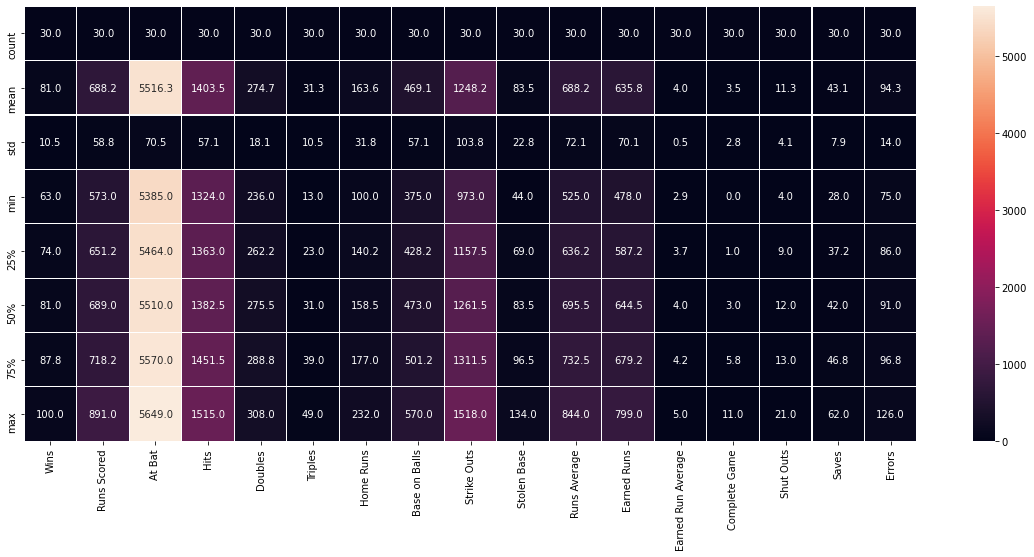

In [7]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


- #### Comment -
     - If we just look at mean and 50% columns for different feature we can see data is sightly right skew for most of features.
     - Count is same for each variable.
     - 75% and max values for Errors, Shutout, Run Scored shows presence of possible outliers.
     - Overall all statstical parameter from mean to max, indicate <b> features are seem to be progressing in a definite manner showing no visible abnormalities.</b>
     -  Heatmap clearly shows data need to scale while building ML Model.

#### Missing value check

<AxesSubplot:>

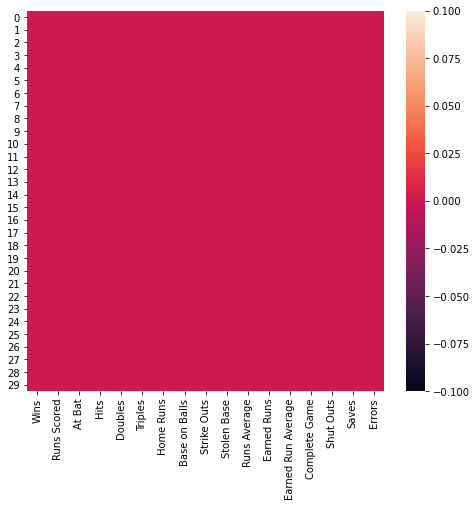

In [9]:
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull())

In [10]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                    Missing Values  % Missing data
Errors                           0             0.0
Base on Balls                    0             0.0
Runs Scored                      0             0.0
At Bat                           0             0.0
Hits                             0             0.0
Doubles                          0             0.0
Triples                          0             0.0
Home Runs                        0             0.0
Strike Outs                      0             0.0
Saves                            0             0.0
Stolen Base                      0             0.0
Runs Average                     0             0.0
Earned Runs                      0             0.0
Earned Run Average               0             0.0
Complete Game                    0             0.0
Shut Outs                        0             0.0
Wins                             0             0.0


- #### Comment -
    There is no null value present in dataset.

# EDA

- Here we can try to bring insight in what feature contribute to win

### Distribution of features

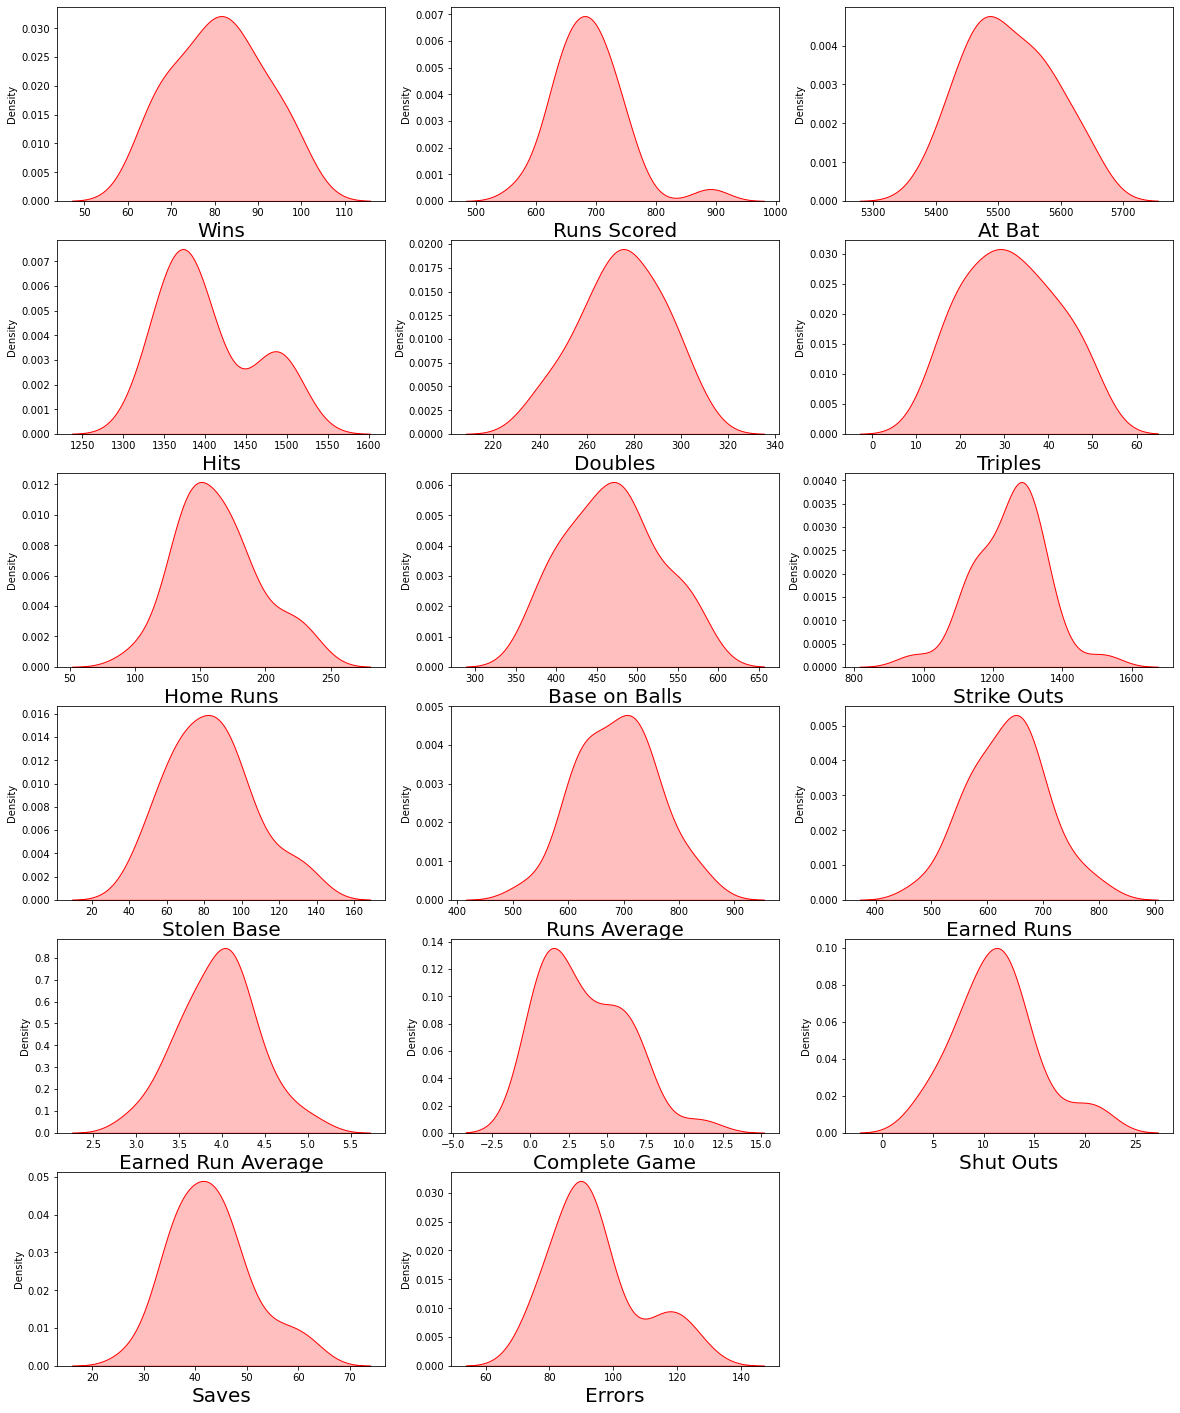

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- #### Comment -
    - Clearly some of feature are either left or right skewed.

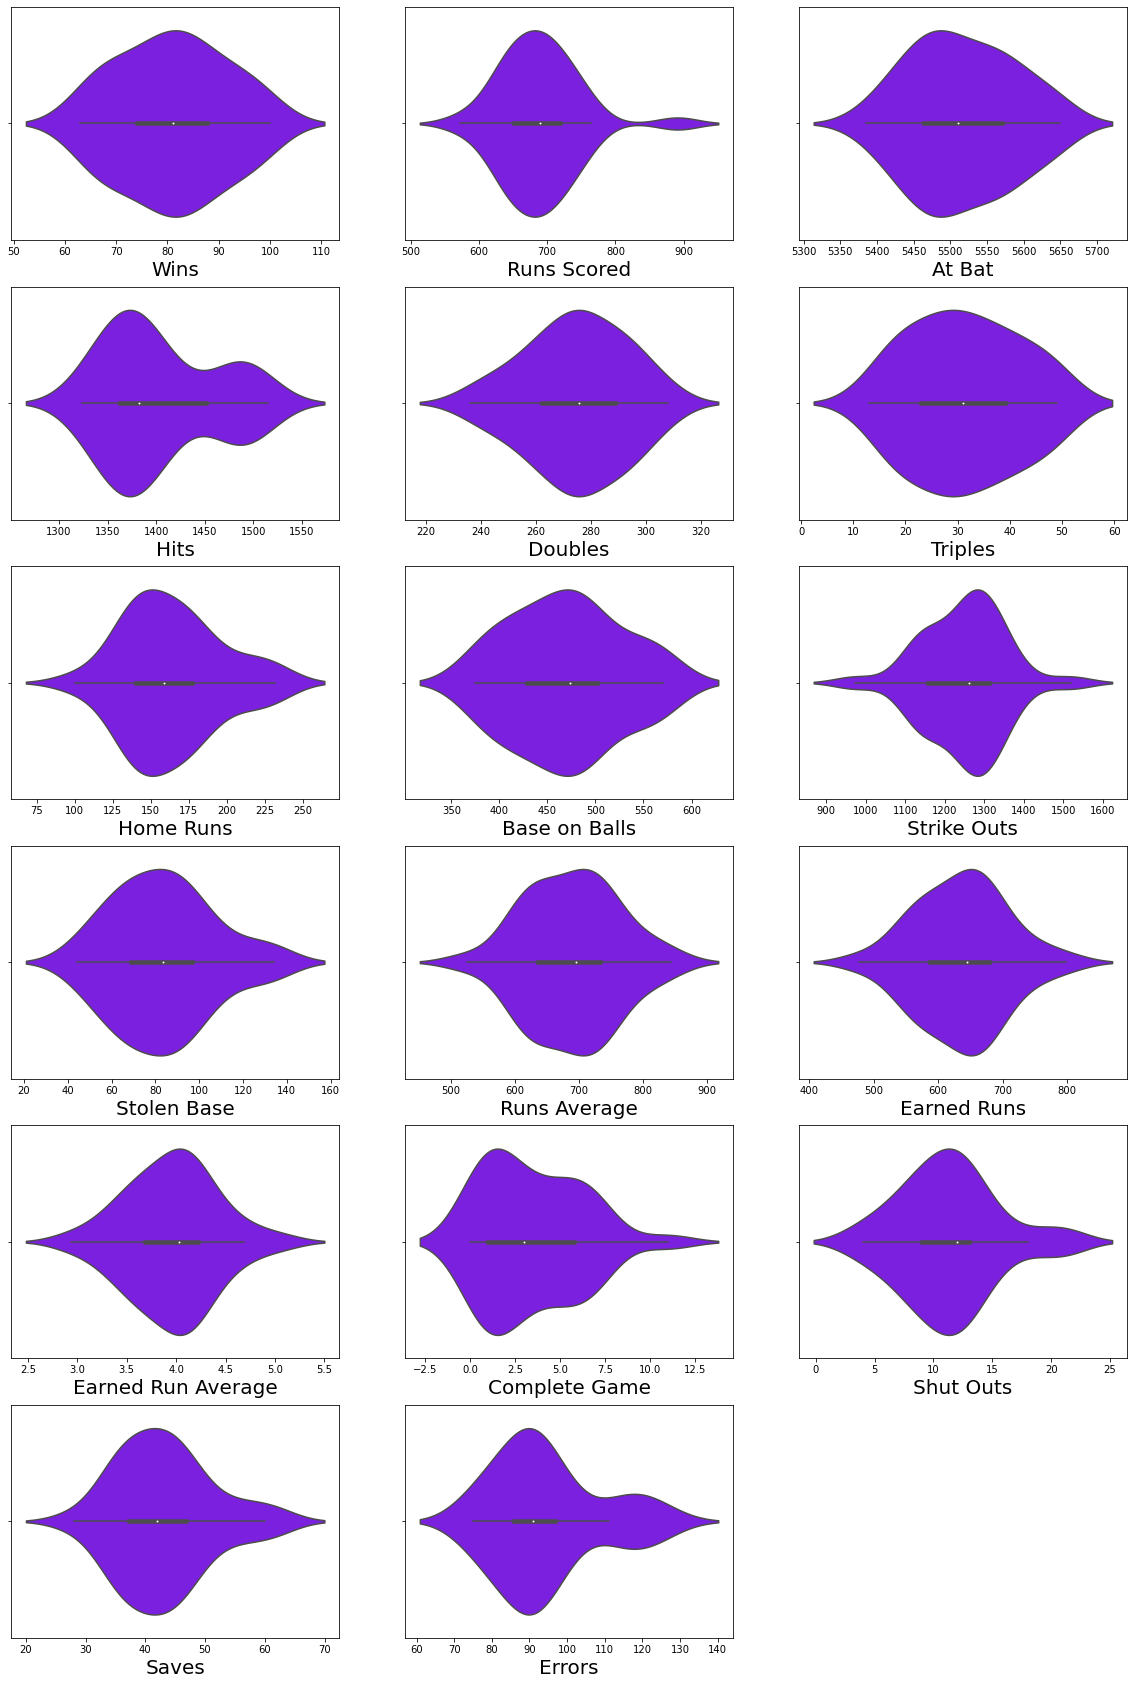

In [12]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- #### Comment -
    - Shut outs and Complete Game occur very rarely now-a-days which we can definately see in violinplot of these variable.
    - An Errors does not count as a hit but still counts as an at bat for the batter, So need to dive into how much Error are contributing to at bat.
    - Most of saves are between 30 & 50. Saves doesnot entitle pitcher as wining pitcher but still it bring wins for team.It will be interesting what relation wins and save held or how much saves contribute in win.
    - Run average, Earned run and Earned run average are important for pitcher statstics. We can see there is not much difference in plot of Earned run and Run Average, so from here we can conclude that Unearned Run doesnot making much difference in wins.
    - Homeruns (125 to 175 peak) are more than triples (20 to 40 majority) so most of good shot by battar directly convert into homeruns.
    - As we know pitcher try to keep Earned run Average low which eventually lead to wins. Here for most of game ERA is around 3.5-4.5.
    - Let consider violinplot of doubles and base on balls. We know that if pitcher pitched ball for consecutive 4 ball then Base is awarded to batter. Clearly More runs comes from base of ball than doubles.
    
    

<b><em> Lets now Investigate Runs and Hits together , before that let dive into how team get win and some clearity over Run Vs Hits </b></em>
- <b> How do u win baseball ? </b>
    - To win in baseball, you must reach the end of the game with more runs than your opponent. If you have the same amount of runs, you will go into another inning until one team has more runs at the end of the inning.
    
- <b> Runs Vs Hits </b>
    - Runs (R) - The number of runs scored by that player, by reaching home base in any manner. 
    - Hits (H) - The number of base hits made by that player, not including reaching base on an error or on a "fielder's choice".
    
<b><em> So Now we will put insight on how many hits convert into Runs and inturn lead to win throgh multivariate analysis </b></em>

Text(0, 0.5, 'Hits')

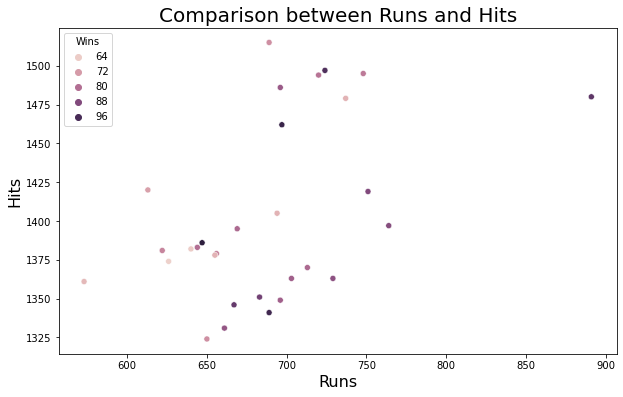

In [13]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Hits'],hue=df['Wins'])
plt.xlabel('Runs',fontsize =16)
plt.ylabel("Hits",fontsize =16)

 - #### Comment : 
      - Even if number of times ball hit bat is less than 1375 still run in range of 650 to 750 contribute to win. 
      - Very less wining chance for run less than 650 and no of hits less than 1325.
      - There is one outlier in runs. After checking sknewness we can decide whether to keep to while building ML model or remove it even if it is valid data point. Definitely it will affect performance of ML model if we consider outlier data points as most of data point will not fall dont in that side. potential leading to biased model.

Text(0, 0.5, 'Home Runs')

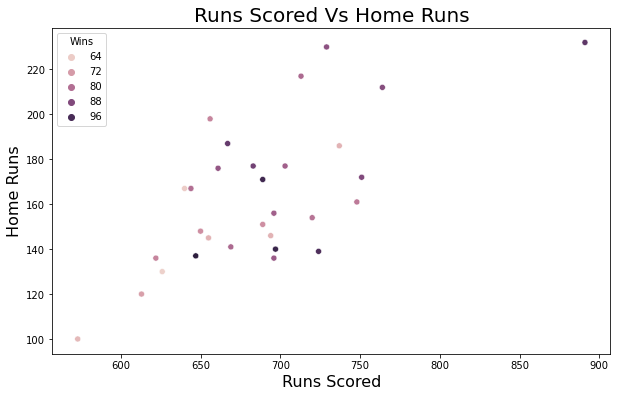

In [14]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Home Runs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Home Runs',fontsize =16)

- #### Comment :
    - Home Runs in range of <u> 140 & 180 </u> with combination of Run Scored in between <u> 650-750 </u> lead to more than 90 Wins for team. So keeping home runs in this range is cruical for more possibility of wins. 
    - But still its game, anything is possible with good performance of single winning player. We can see from scatter plot some of the datapoints have homeruns above 200, but still in wins are around 80.
    
 <b> In conclusion we can say that Home runs is definitely contributing factor for team to win but not sufficient to make sure win. </b>

Text(0, 0.5, 'At Bat')

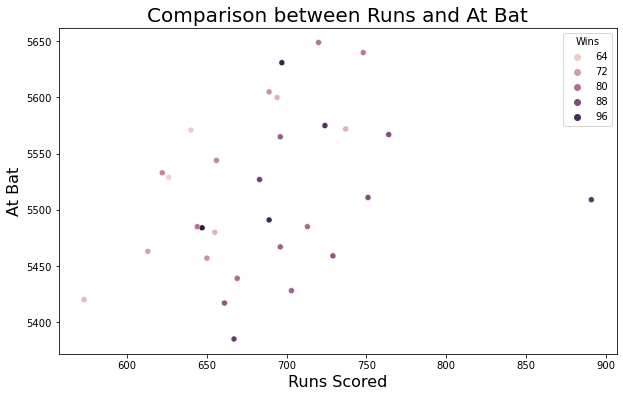

In [15]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and At Bat', fontsize =20)
sns.scatterplot(df['Runs Scored'],df['At Bat'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel("At Bat",fontsize =16)

- #### Comment :
    - We doesnot get any benchmark range for at bats from here. So <b>it is questionable things that how much At bats matter to winning statstics.</b> Atleast we get here that At Bat and Run Scored has positive linear relationship, which means that more Run Scroed naturally lead to more at bats.

Text(0, 0.5, 'Strike Outs')

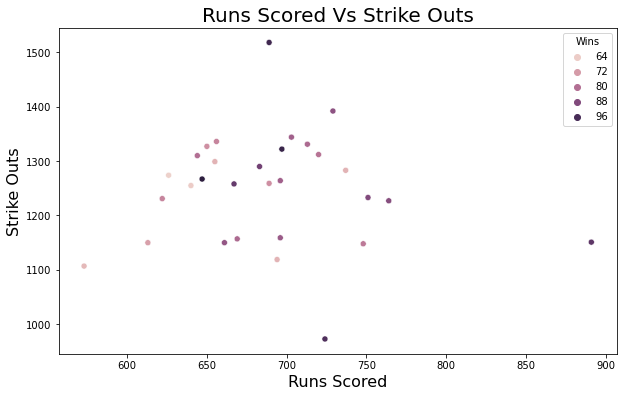

In [16]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Strike Outs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Strike Outs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Strike Outs',fontsize =16)

- #### Comment :
    - In simple word strike Outs means batter is out. We can see Strike out opponent team below 700 runs essential for more win. 
    - Clearly Strikeout below 1200 is like <b><em>making recipe for losing game.</em></b> Strikeouts in regular interval not only lead to pressure on opponent in game but also bring break on high run score.

Text(0, 0.5, 'Earned Run Average')

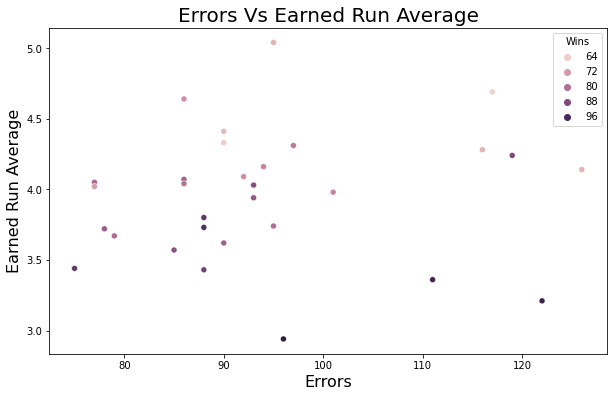

In [17]:
# Checking the relation between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('Errors Vs Earned Run Average',fontsize =20)
sns.scatterplot(df['Errors'],df['Earned Run Average'],hue=df['Wins'], cmap=('Spectral'))
plt.xlabel('Errors',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

- #### Comment -
    - <b><em>Same result about ERA we got here as we get in Violin Plot</em></b>.
    - Keeping ERA below 3.5 or as much as low by Pitcher means sure win. By keeping low ERA pitcher saves run for his team.
    - Another things we can see in above scatter plot is that <b> Minimum error means maximum wins.</b> Keeping Errors below number 90 can be held as benchmark.

Text(0, 0.5, 'Earned Run Average')

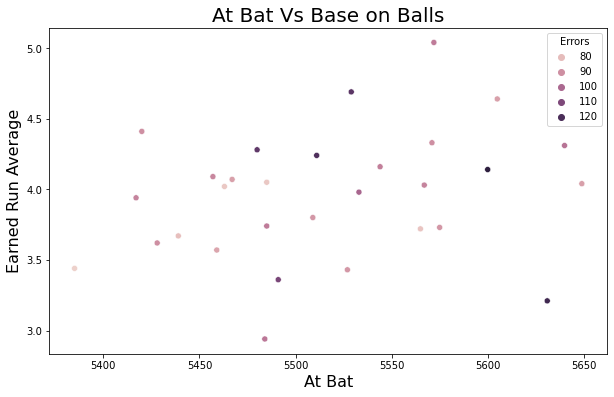

In [18]:
# Checking the relation between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('At Bat Vs Base on Balls',fontsize =20)
sns.scatterplot(df['At Bat'],df['Earned Run Average'],hue=df['Errors'], cmap=('Spectral'))
plt.xlabel('At Bat',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

- #### Comment :
    - At Bat Vs Base on Balls doesnot give any significant imformation than High ERA means High Errors.

### Boxplot of Features

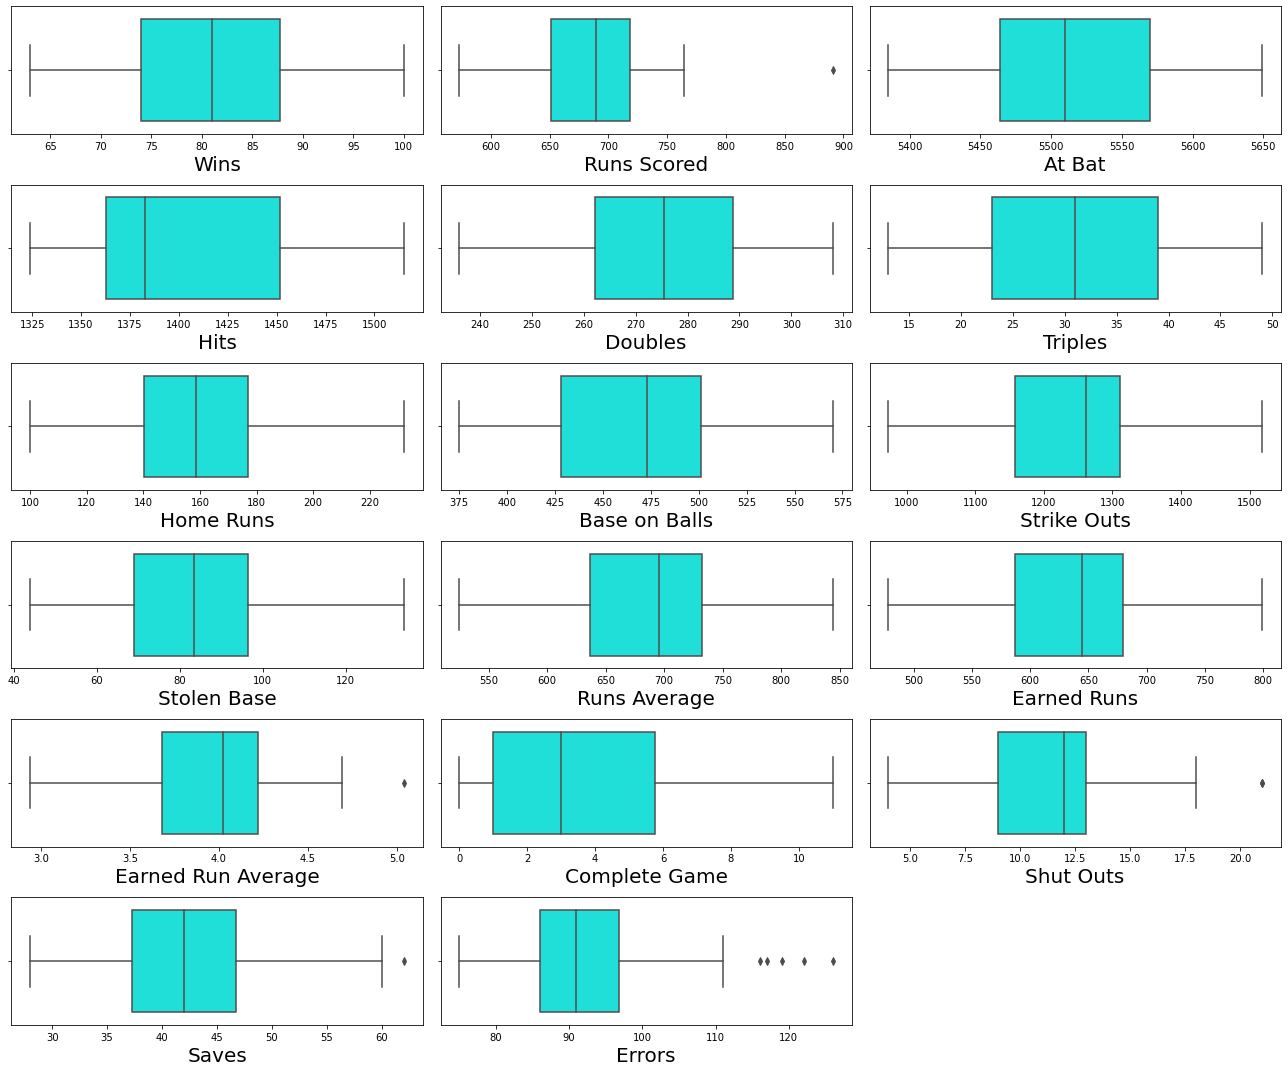

In [19]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- #### Comment :
    - There are some outliers present in data. But as data is of Real world MLB 2014, these outliers are valid datapoints.
    - Shutouts are rare but completely possible with exceptional performance.
    - Run scored has one outliers but as Run is one of the most important parameter, it will be wise to remove corresponding datpoint.
    - Outliers in Errors are totally possible so now need to worry about it.

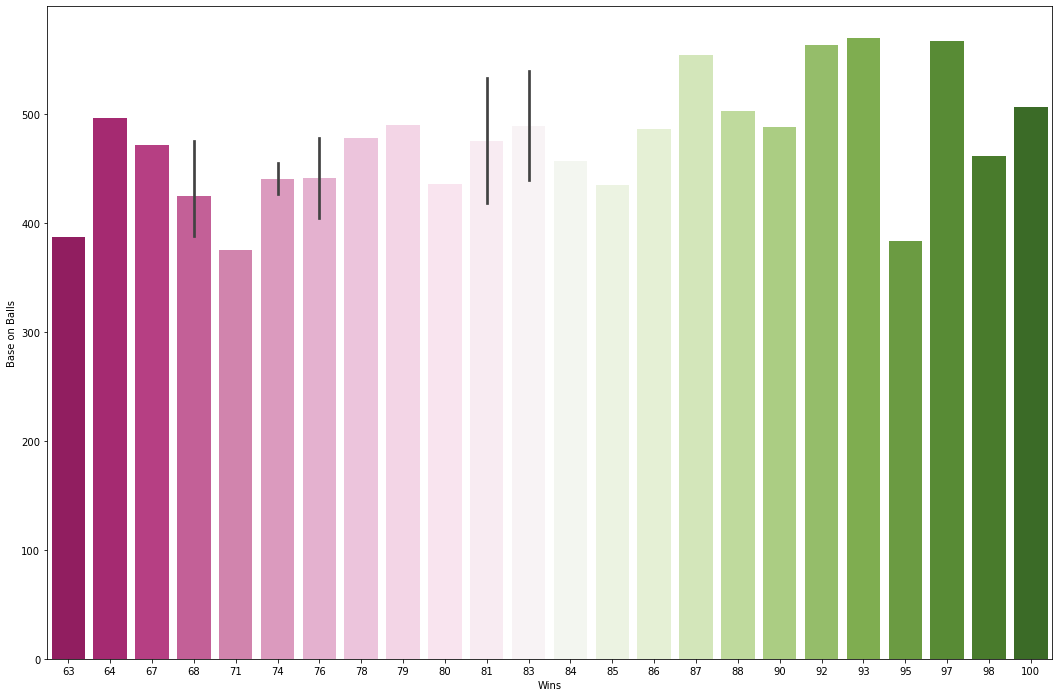

In [20]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Base on Balls", data=df,palette='PiYG')
plt.show()

- #### Comment :
    - Base on ball is contribution from pitcher to batter for winning. In simple word it is like Wide or No Ball in Cricket.
    - We can see that base on ball above 400 really contribute in Wins in team.

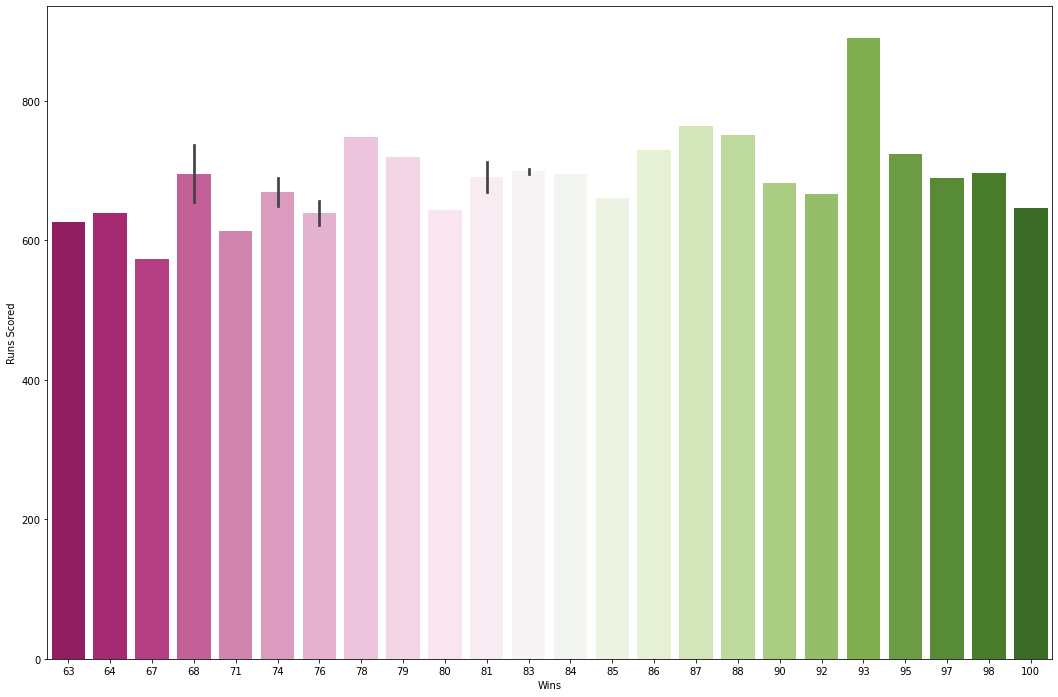

In [21]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Scored", data=df,palette='PiYG')
plt.show()

- #### Comment:
    - Run Scored above 600 is benchmark for wining in any scenerio

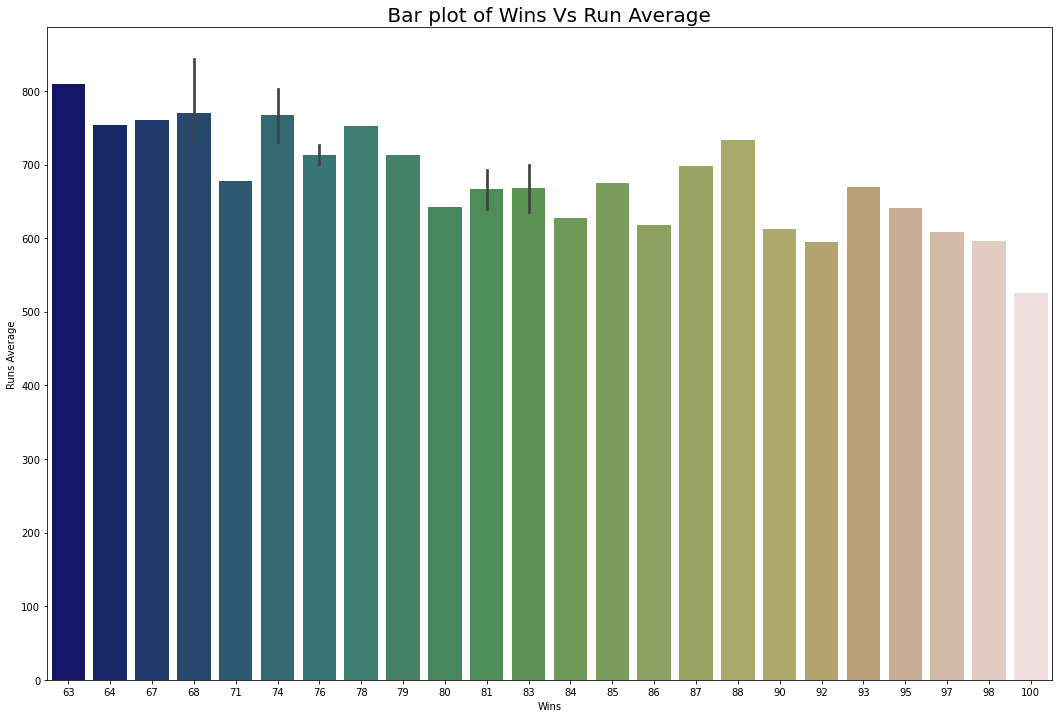

In [34]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Average", data=df,palette='gist_earth')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

- #### Comment :
    - Here comes interesting plot, we can see Run Average decrease with increase in number of wins. <b>But why this trend if more runs means directly increase in chance of winning.</b>
    - <u> More Run Average gives advantage to hitter and here as wins are high even at low run this clearly means that perforamance of pitcher is better than hitter i.e. pitcher is knocking out hitter at low run score. This must be reflected in any pitcher side stastical parameter like Strike outs, Earned Run or Earned Run Average.</u>
    
<b><em> Lets try find answer of this millon dollor puzzle by diving more into relation of Wins with parameters like ERA, strikeouts.</b></em>

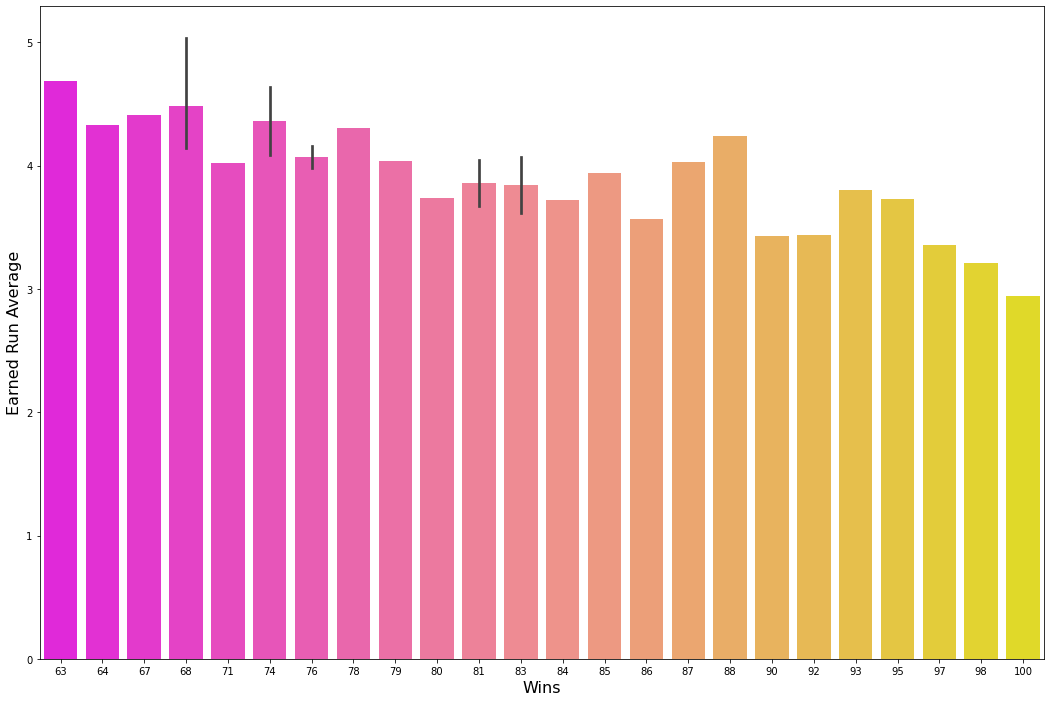

In [26]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Earned Run Average", data=df,palette='spring')
plt.xlabel('Wins',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)
plt.show()

- #### Comment :
    <b><em>And here we got what we looking for.As we thought there must be atleast one pitcher parameter where this decreasing trend must be reflected.</em>
    - ERA is low for maximum wins. Low ERA by pitcher clearly means that pitcher is giving less chance given to batter to score run.
    - We already come to conclusion of keeping ERA less than 3.5 in previous result. This plot also support that story.
    - But this also indicate that <b> ERA and Runs Average score are bound to related with each other in linear relationship</b> (may be positive or negtive).
    - Another things here is <b> that Earned Run and Wins must have negative relationship.</b> we will check it in further investigation.
    
<b> Let check it through strip plot between Runs Average and Earned Run Average </b>

Text(0, 0.5, 'Earned Run Average')

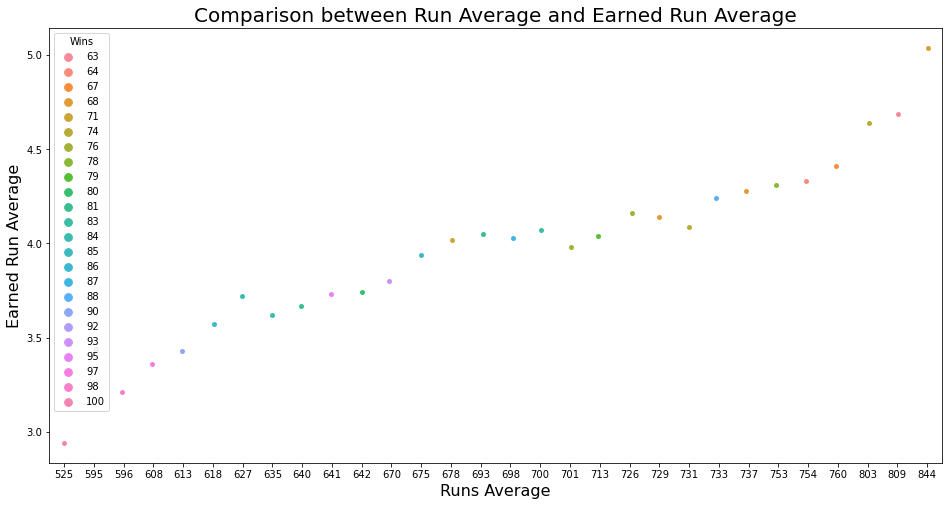

In [31]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(df['Runs Average'],df['Earned Run Average'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)

- #### Comment :
    Here we got what we suspect in previous plot. ERA and RA hold linear relationship.
    
<b> Now let check strikeout show same behavior as ERA with respect to Runs Average.</b>

Text(0, 0.5, 'Strike Outs')

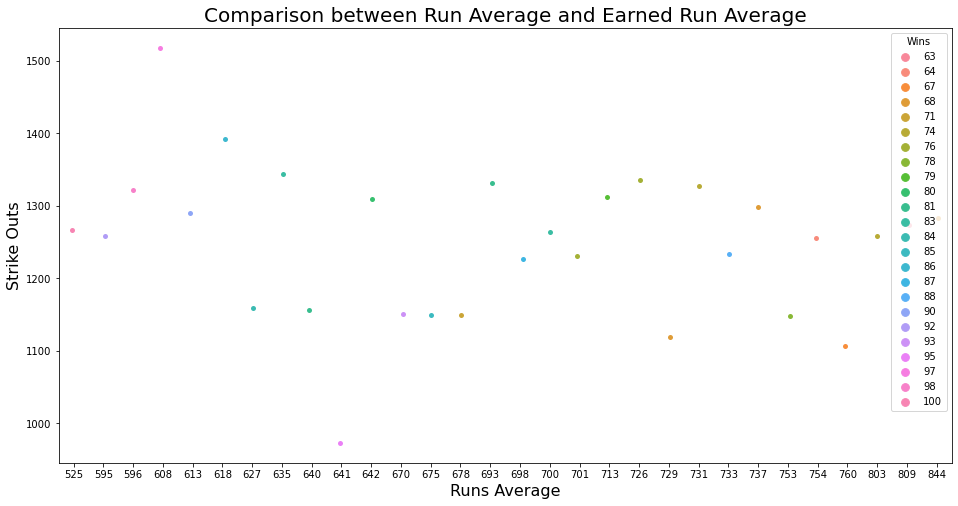

In [33]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(df['Runs Average'],df['Strike Outs'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Strike Outs",fontsize =16)

- #### Comment :
    Strike outs are randomly placed giving not much any significant insights. Most probably strikeouts doesnot matter.

- <b><em> There is one outlier in Runs score, lets check that entry </b></em>

In [38]:
df['Runs Scored'].max()

891

In [37]:
df.loc[df['Runs Scored']==891]

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


- It seem like highest Doubles, Homeruns and base ball also belong to this entry. Let cross check

In [42]:
df['Home Runs'].max(),df['Base on Balls'].max(),df['Doubles'].max()

(232, 570, 308)

- Here we got what we suspect.

<b><em> In one of the previous result we suspect that Earned Run/Earned Run Average and Wins must have negative relationship, let check by looking at jointplot.</b></em>

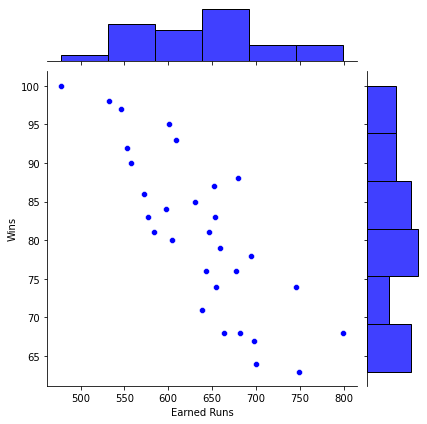

In [46]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="blue",palette="Set1")

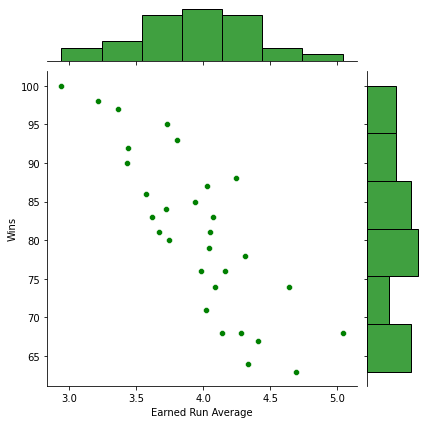

In [47]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="green",palette="Set1")

<b><em> Jointplot shows same story about Earned Run/Earned Run Average and Wins having linear negative relationship</b></em>

#### Let check relationship between saves and wins

<Figure size 720x720 with 0 Axes>

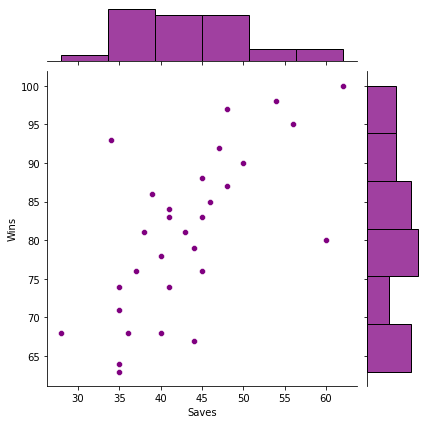

In [50]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Saves", y="Wins", data=df, color="purple")

- #### Comment :
    - A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances 
    - Here with increase in the number of save increases the number of wins.

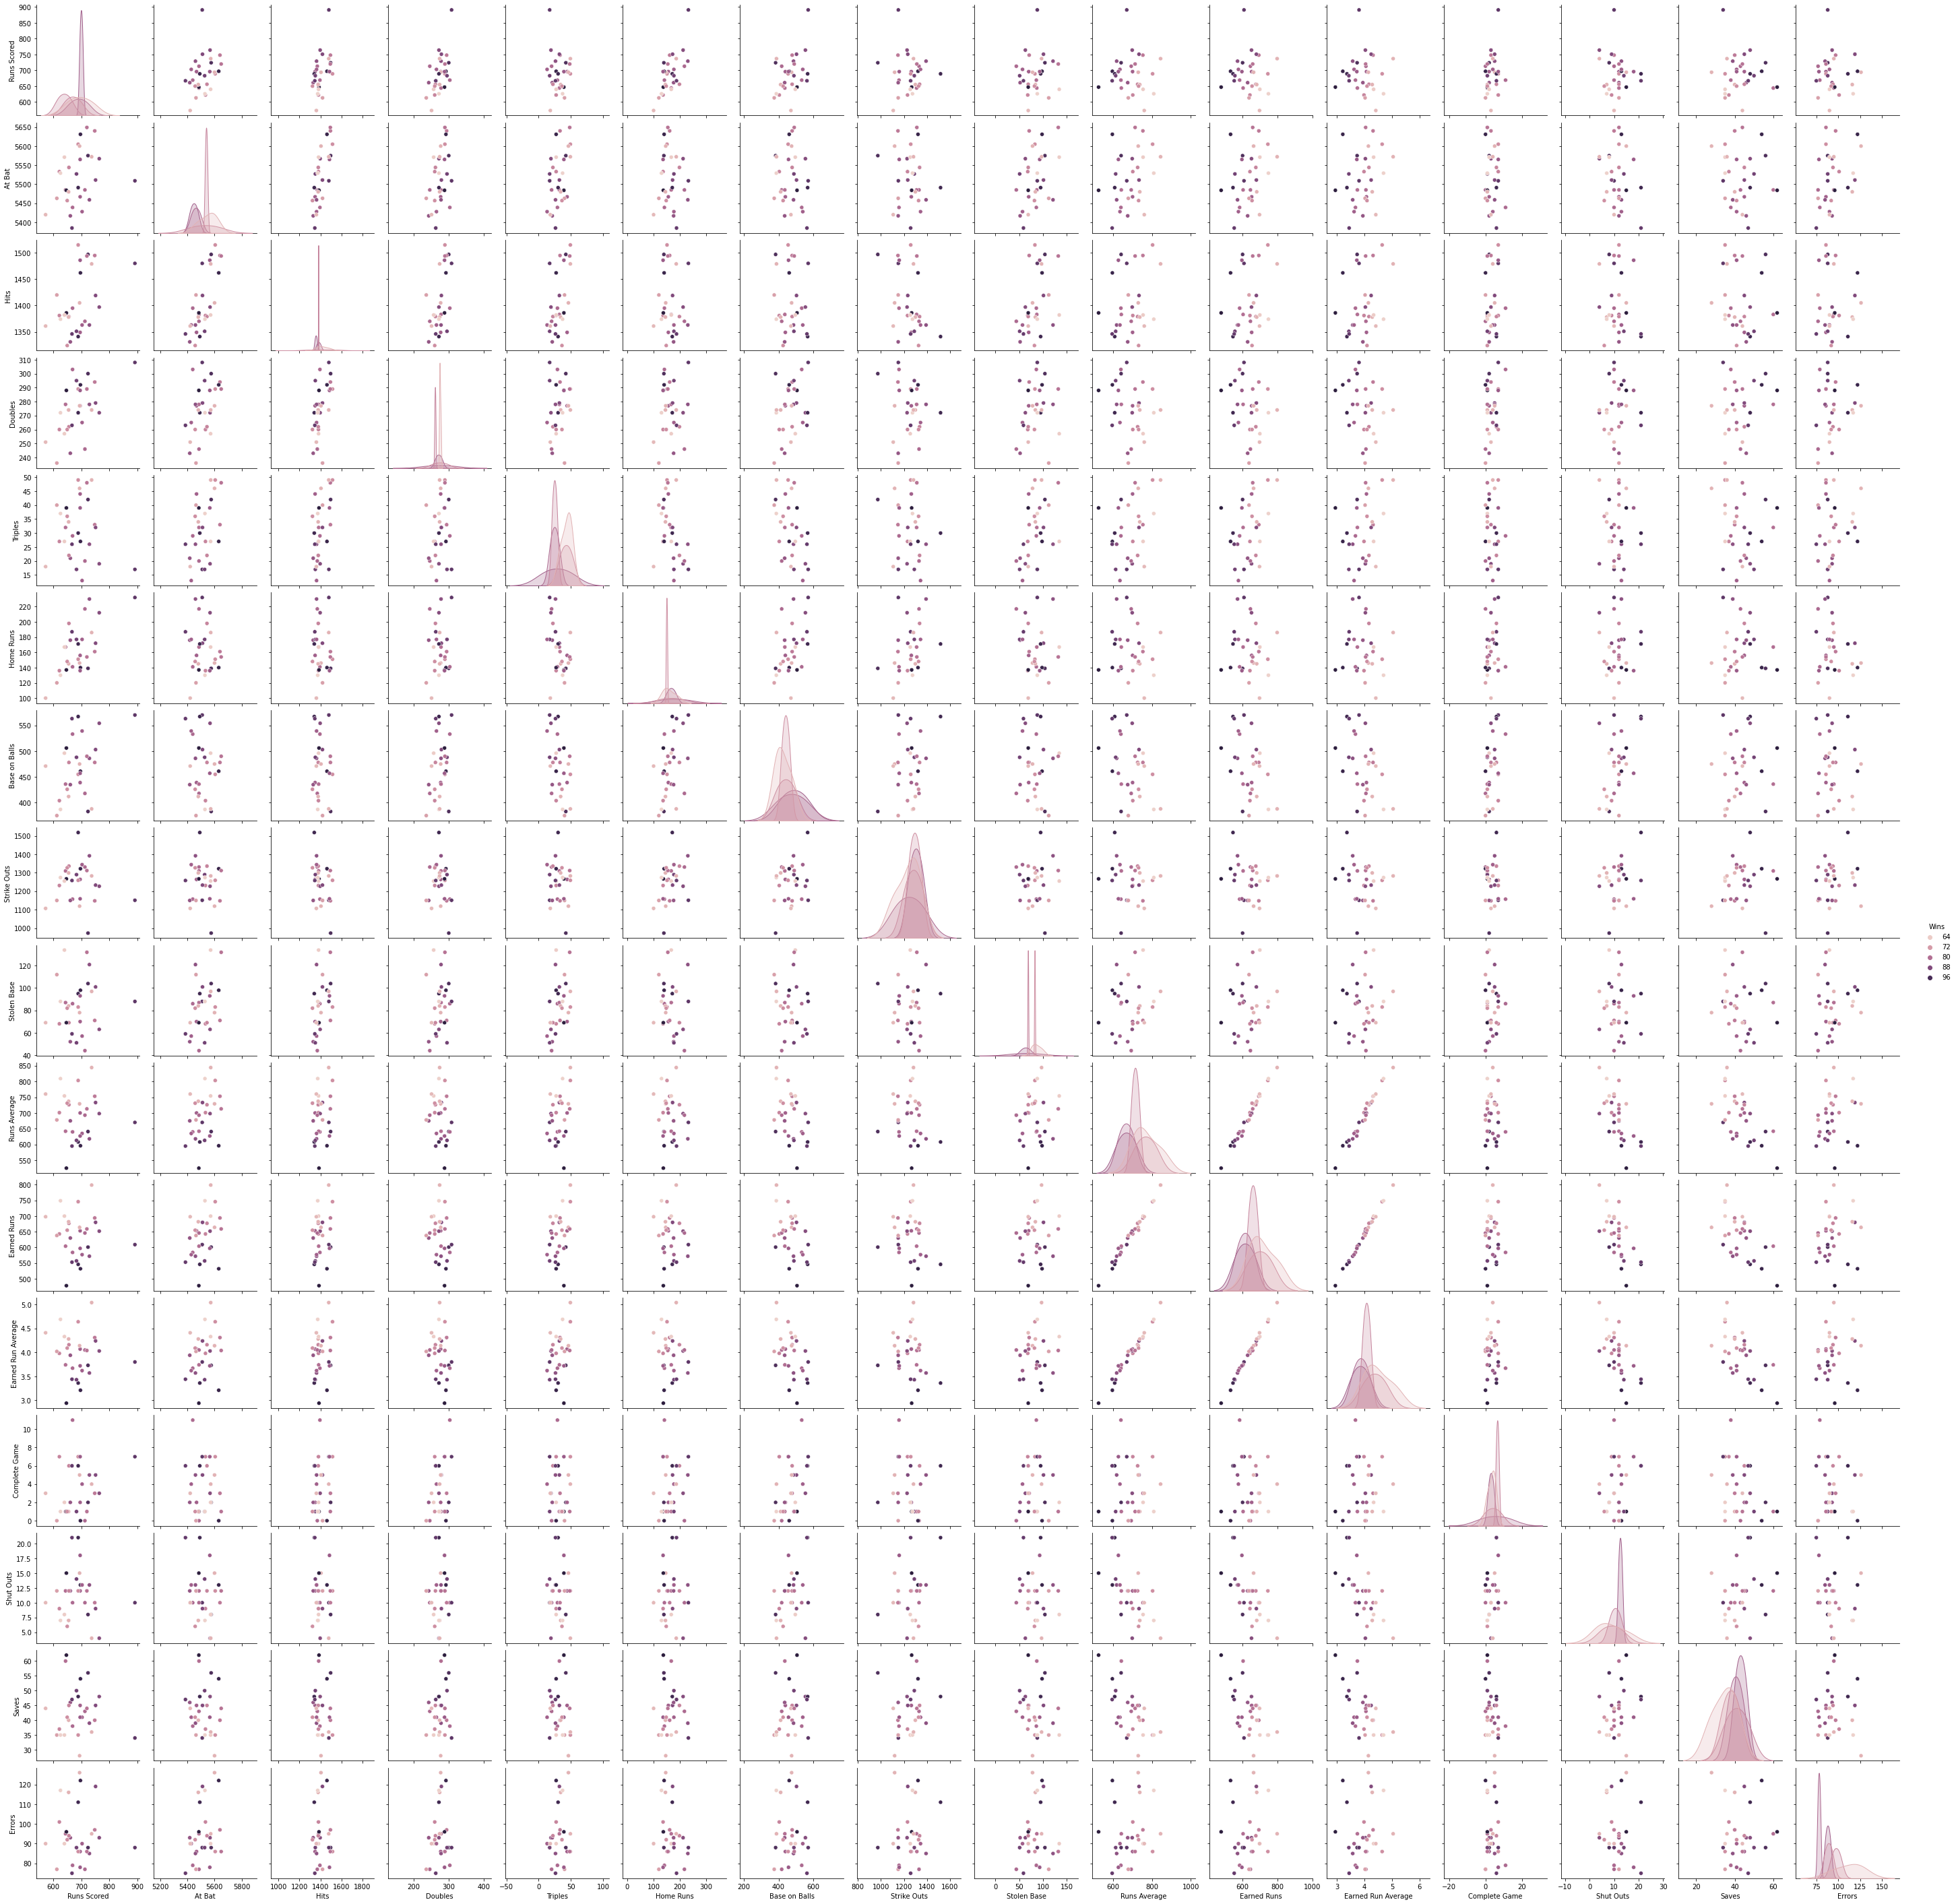

In [51]:
sns.pairplot(df, hue="Wins")

In [ ]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Outliers Detection and Removal 

In [104]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [105]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (29, 17)


##### Data Loss

In [83]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


# Feature selection and Engineering

## 1. Skewness of features

In [101]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

#### Comment -
1. Optimal range for skewness is -0.5 to 0.5.
2. Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, need to transform.

#### Transforming positive or right skew data using boxcox transformation

In [66]:
from scipy.stats import boxcox

In [106]:
df1['Hits']=boxcox(df1['Hits'],-2)

In [114]:
df1['Shut Outs']=boxcox(df1['Shut Outs'],0.5)

In [113]:
df1['Saves']=boxcox(df1['Saves'],0.5)

- <b>Other feature not able transform by Boxcox Method as they showing data must be positive. So others columns are transfrom using yeo-johnson method</b>

In [86]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [109]:
EC=['Errors','Complete Game']
ds =df1[EC].copy()

In [110]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)   
new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

,Errors,Complete Game
0,-0.348265,-0.307098
1,-0.540820,-0.307098
2,-1.326125,2.011315
3,0.650818,1.264463
4,-0.540820,1.264463


In [111]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
dataset.index=df1.index
df1[EC]=dataset[EC]

#### Skewness after transforming features

In [115]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

- <b> All features skewness is now transform within permissible limit of -0.5 to 0.5 as shown above </b>

### 2. Corrleation 

In [116]:
df1.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.025885,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.477949,0.754886,-0.079633
Runs Scored,0.390451,1.000000,0.438022,0.429083,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.119300,0.071589,0.039865
At Bat,-0.085780,0.438022,1.000000,0.771485,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.193987,-0.127766,0.332002
Hits,-0.025885,0.429083,0.771485,1.000000,0.525668,0.574467,-0.219890,-0.220426,-0.375825,0.424369,0.241583,0.278600,0.254635,0.070020,-0.134500,-0.093443,-0.012712
Doubles,0.384886,0.469293,0.490752,0.525668,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088345,0.258675,0.152541
Triples,-0.206737,0.134204,0.445604,0.574467,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.067667,-0.236230,0.080498
Home Runs,0.245697,0.586894,-0.064653,-0.219890,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.030256,0.084263,-0.165883
Base on Balls,0.447513,0.258450,-0.137850,-0.220426,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.434799,0.197177,-0.056106
Strike Outs,0.156469,0.081158,-0.111243,-0.375825,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.200067,0.105667,0.164817
Stolen Base,-0.169503,0.075323,0.373674,0.424369,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.098740,-0.187605,0.070527


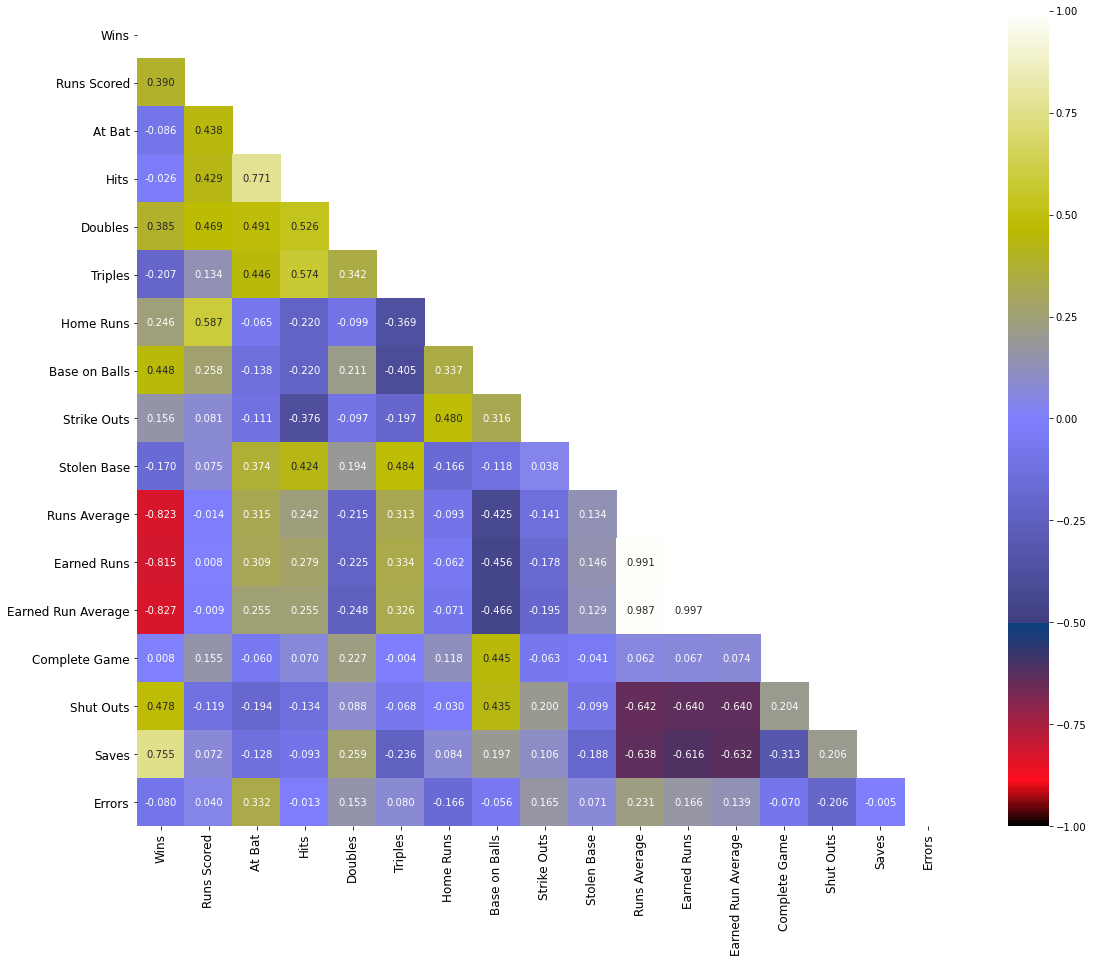

In [119]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

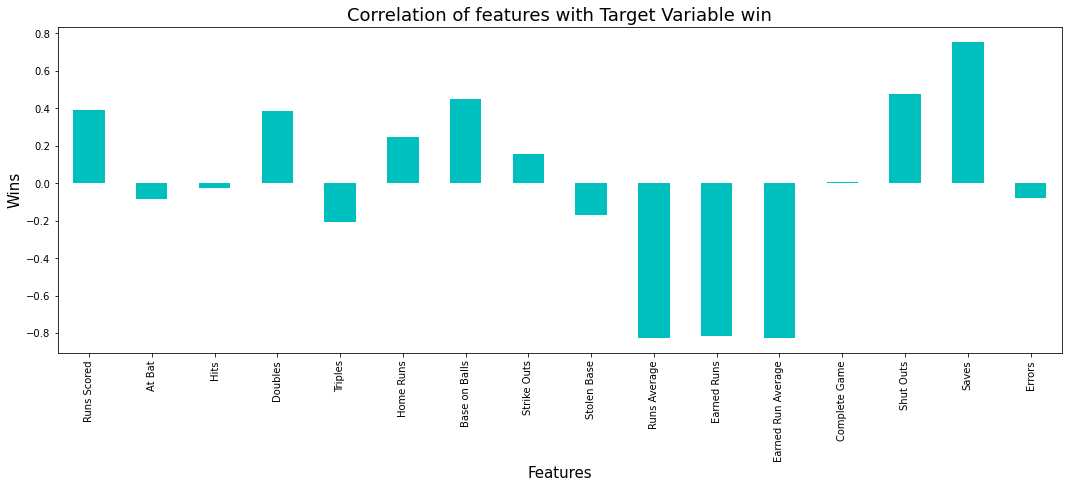

In [120]:
plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

- #### Comment :
    - Hits, At bats, Complete game and errors are very poorly correlated with target variable.
    - Saves, ERA,RA,EA are highly correleated with target variable.
    - here is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average". This need to check.

<b>This multicollinearity need to check it with varaiance inflation factor or need to address by use of PCA.</b>

### 3. Checking Multicollinearity between features using variance_inflation_factor

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df2.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,1164.543214,Wins
1,3253.807721,Runs Scored
2,5181.779465,At Bat
3,4817.334228,Hits
4,1157.105781,Doubles
5,32.435486,Triples
6,309.301103,Home Runs
7,302.099558,Base on Balls
8,400.292880,Strike Outs
9,28.665516,Stolen Base


- #### Comment :
<b> It is natural to have such high multicollinearity due to following reason :- </b>
    1. Earned Run Average,Earned Runs,Runs Average are highly correlated with each other.
    2. At Bat and Hits are 0.771 correlated with each other. But at same time very poor correlated with target variable.
    3. <b> Another most important reason is data need to scale which we did not scale until now. </b>

#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by Second way for further investigation. </b>

## Standard Scaling

In [201]:
X=df1.drop(columns =['Wins'])
Y=df1['Wins']

In [202]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## PCA 

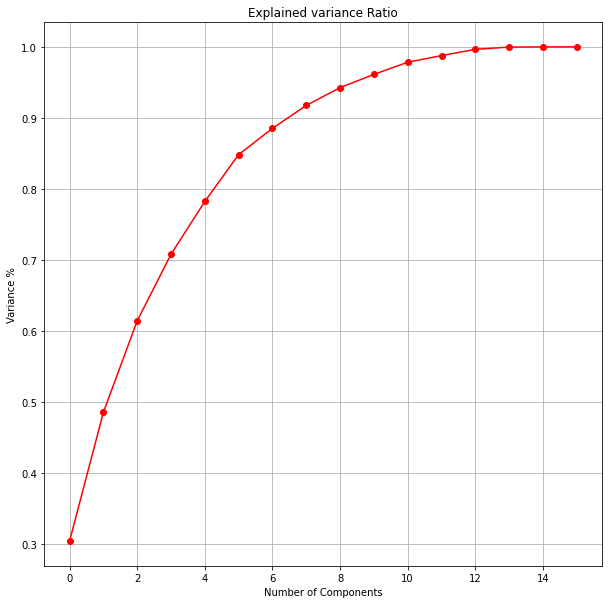

In [191]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 7 principal components attribute for 95% of variation in the data.  We shall pick the first 7 components for our prediction </b>

In [192]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [193]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

#### Checking Multicollinearity after applying PCA

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


<b> We can see that  Multicollinearity issue is clear now.</b>

# Machine Learning Model Building

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


####  Finding Best Random state

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851039 on Random_state 217


## Linear Regression : Base model

In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins:
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


### Linear Regression Evaluation Matrix

In [205]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.5623356267648196
Mean squared error : 8.560199512884235
Root Mean Squared Error: 2.925781863516868


 R2 Score :
0.917973833085104


#### Cross validation

In [206]:
# Cross Validation
score = cross_val_score(lin_reg, principle_x, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.3354655028709028


 True Values Vs Predicted Value plot :


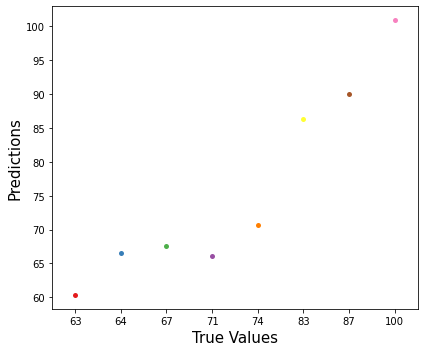

In [153]:
plt.figure(figsize=(6,5))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Finding best n_neighbors for KNN Regressor

In [207]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


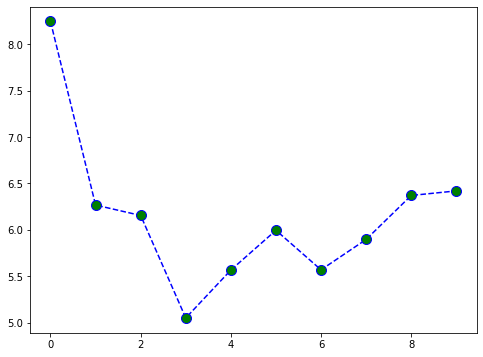

In [208]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment- 
At k= 4, we get the minimum RMSE value which approximately 5.050525962709231, and shoots up on further increasing the k value. We can safely say that k=4 will give us the best result in this case

----------------------------------------------------------------------------------------------------------------------

## Applying other Regression Model, Evaluation & Crossvalidation

In [261]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 4.732300000000002
Mean squared error : 37.424012617777805
Root Mean Squared Error: 6.117516866979429


 R2 Score :
0.6413929020006319


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.25631013522941115


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 2.5162689682579664
Mean squared error : 8.44861521848299
Root Mean Squared Error: 2.9066501713283266


 R2 Score :
0.9190430642337308


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : 0.6710873546839929


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 2.57123505518942
Mean squared error : 8.554305404400719
Root Mean Squared Error: 2.924774419404122


 R2 Score :
0.9180303120404782


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : 0.6706084407569662


 Error of  

#### we can see that Lasso Regression gives maximum R2 score of 91.90%. So we will apply Hyperparameter tuning on Lasso Regression



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


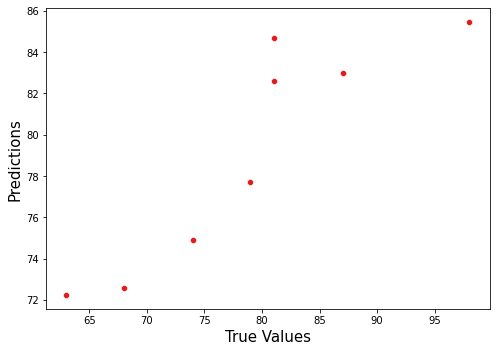





 True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :


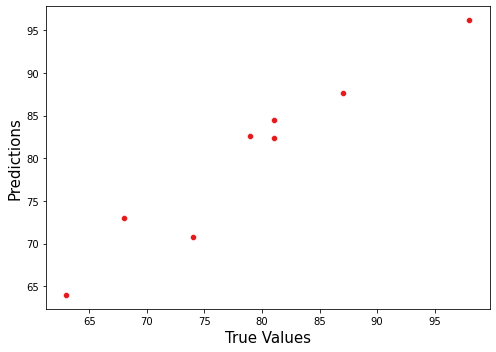





 True Values Vs Predicted Value plot Ridge(alpha=0.01, normalize=True) :


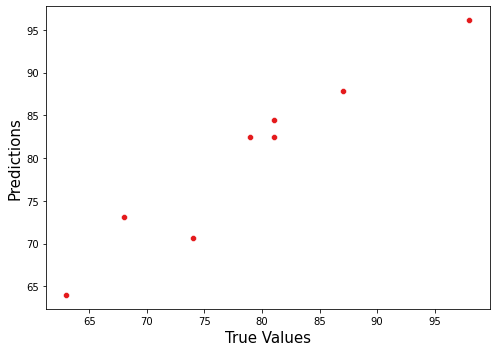





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


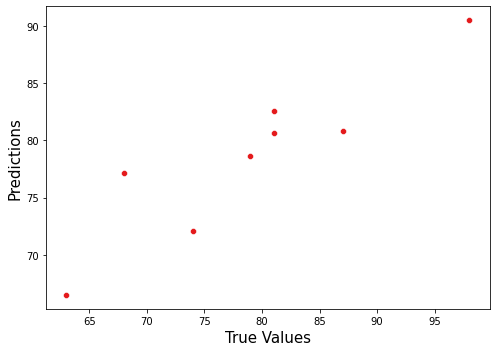





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


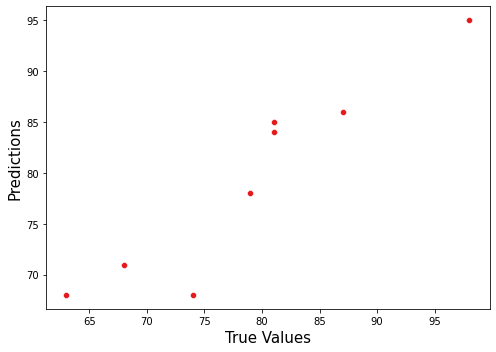





 True Values Vs Predicted Value plot AdaBoostRegressor() :


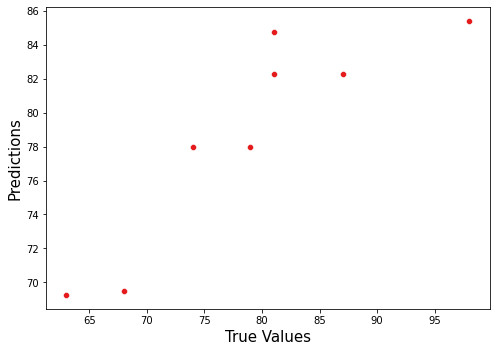





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


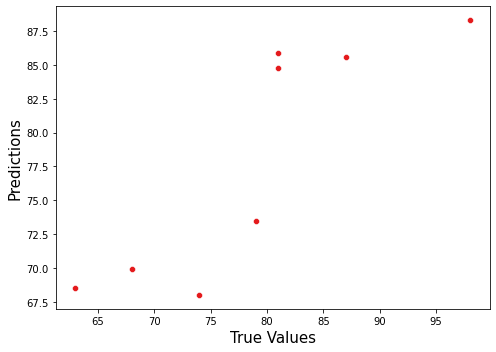





 True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :


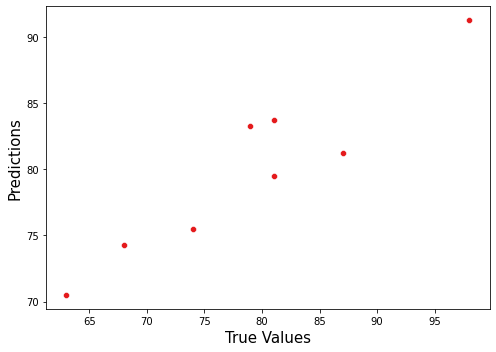





 True Values Vs Predicted Value plot XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :


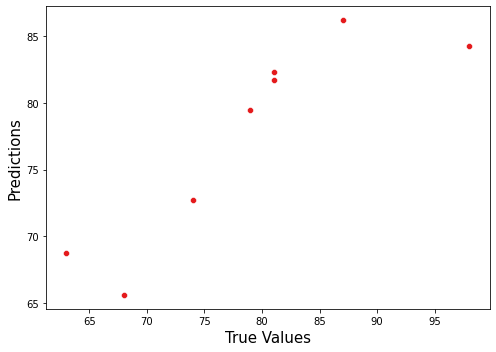

In [214]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

# Hyper Parameter Tuning : GridSearchCV

In [217]:
from sklearn.model_selection import GridSearchCV

In [252]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [253]:
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [254]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2104 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 9016 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 12344 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 16184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 20536 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 25400 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 30776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 36664 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 43640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 57464 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 72312 ta

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [255]:
GCV.best_params_

{'alpha': 0.5,
 'fit_intercept': True,
 'max_iter': 250,
 'normalize': True,
 'random_state': 32,
 'selection': 'random'}

# Final Model

In [256]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.688805523945412
Mean squared error : 9.617386970550847
Root Mean Squared Error: 3.101191217992023


 R2 Score of Final Model :
0.9078435744699425




 True Values Vs Predicted Value plot :


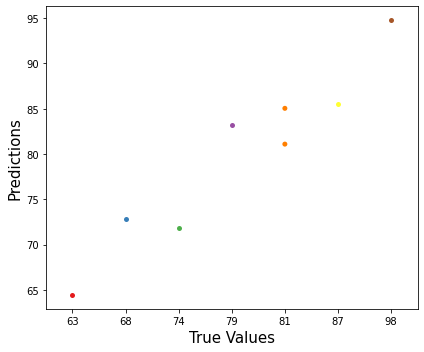

In [258]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Saving model

In [260]:
import joblib
joblib.dump(Final_mod,'Baseballn_Final.pkl')

['Baseballn_Final.pkl']